In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [8]:
messages=[line.rstrip() for line in open ('SMSSpamCollection')]
len(messages)

5574

In [16]:
messages[22]

'ham\tSo ü pay first lar... Then when is da stock comin...'

In [13]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message, '\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [14]:
import pandas as pd

In [19]:
messages=pd.read_csv('SMSSpamCollection', sep='\t', names=['label','messages'])
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [22]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [24]:
messages['length']=messages['messages'].apply(len)
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

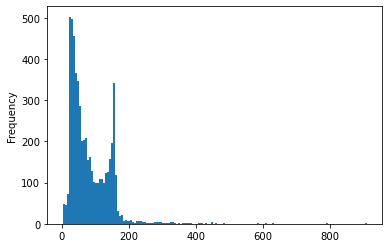

In [28]:
messages['length'].plot.hist(bins=150)

In [30]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [33]:
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f863aa33a60>,
      dtype=object)

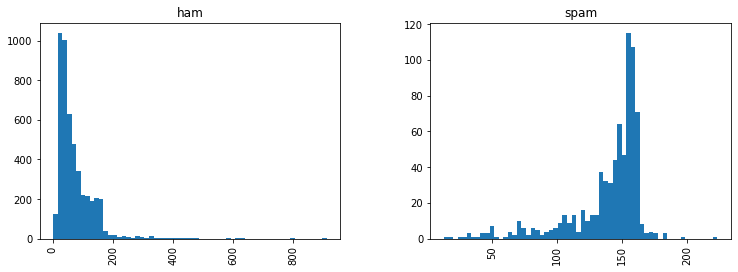

In [34]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [35]:
import string

In [36]:
mess='Simple message! Notice: It has pinctuation.'

In [41]:
nopunc=[c for c in mess if c not in string.punctuation]

In [42]:
from nltk.corpus import stopwords

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
nopunc=''.join(nopunc)
nopunc

'Simple message Notice It has pinctuation'

In [46]:
nopunc.split()

['Simple', 'message', 'Notice', 'It', 'has', 'pinctuation']

In [48]:
clean_mess=[w for w in nopunc.split() if w.lower()not in stopwords.words('english')]
clean_mess

['Simple', 'message', 'Notice', 'pinctuation']

In [50]:
def text_process(mess):
    """
    1.remove punc
    2.remove stop words
    3.return list of clean words
    """
    nopunc=[c for c in mess if c not in string.punctuation]
    nopunc=''.join(nopunc) #joins by desired string
    return [w for w in nopunc.split() if w.lower()not in stopwords.words('english')]

In [52]:
messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
bow_transf=CountVectorizer(analyzer=text_process).fit(messages['messages']) #Tokenizer into bag of words as vectors

In [56]:
print(len(bow_transf.vocabulary_))

11425


In [58]:
m4=messages['messages'][3]
m4

'U dun say so early hor... U c already then say...'

In [61]:
b4=bow_transf.transform([m4])
print(b4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [63]:
b4.shape

(1, 11425)

In [65]:
bow_transf.get_feature_names()[9554]

'say'

In [66]:
mess_bow=bow_transf.transform(messages['messages'])

In [69]:
print('Shape: ',mess_bow.shape)

Shape:  (5572, 11425)


In [70]:
mess_bow.nnz

50548

In [73]:
sparsity = (100.0 * mess_bow.nnz / (mess_bow.shape[0] * mess_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

In [75]:
tft=TfidfTransformer().fit(mess_bow) #Frequency of words as a sparse matrix (term f inverse doc f)

In [80]:
tft4=tft.transform(b4)
print(tft4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [81]:
tft.idf_[bow_transf.vocabulary_['university']]

8.527076498901426

In [82]:
m_tft=tft.transform(mess_bow)

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
spam_d=MultinomialNB().fit(m_tft,messages['label']) #Multinomial Naïve Bayes for maximum likelihood

In [85]:
spam_d.predict(tft4)[0]

'ham'

In [89]:
messages['label'][3]

'ham'

In [91]:
all_pred=spam_d.predict(m_tft)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['messages'],messages['label'],test_size=0.3)

In [94]:
from sklearn.pipeline import Pipeline

In [96]:
pl=Pipeline([('bow',CountVectorizer(analyzer=text_process)),
             ('tfidf',TfidfTransformer()),
             ('classifier',MultinomialNB())])

In [97]:
pl.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f865bbb6790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [98]:
pred=pl.predict(msg_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
print(classification_report(label_test,pred))
print(confusion_matrix(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1440
        spam       1.00      0.71      0.83       232

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

[[1440    0]
 [  68  164]]


In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
pl1=Pipeline([('bow',CountVectorizer(analyzer=text_process)),
             ('tfidf',TfidfTransformer()),
             ('classifier',RandomForestClassifier())])

In [103]:
pl1.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f865bbb6790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [104]:
pred=pl1.predict(msg_test)

In [105]:
print(classification_report(label_test,pred))
print(confusion_matrix(label_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1440
        spam       1.00      0.77      0.87       232

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

[[1440    0]
 [  54  178]]


In [107]:
yelp=pd.read_csv('yelp.csv')
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [108]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [112]:
yelp['text length']=yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


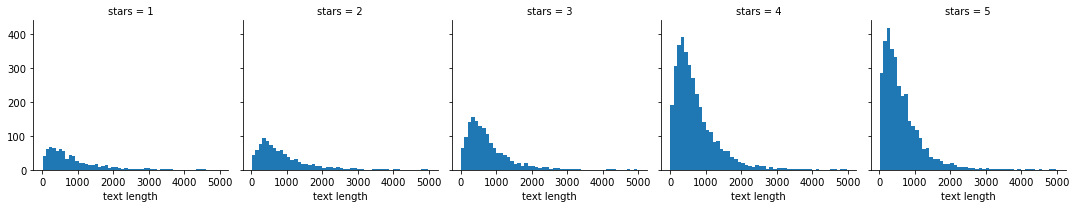

In [117]:
g=sns.FacetGrid(data=yelp,col='stars')
g.map(plt.hist,'text length',bins=50)

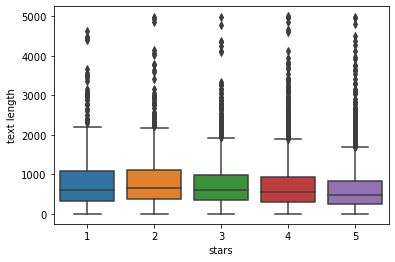

In [118]:
sns.boxplot(x='stars',y='text length',data=yelp)

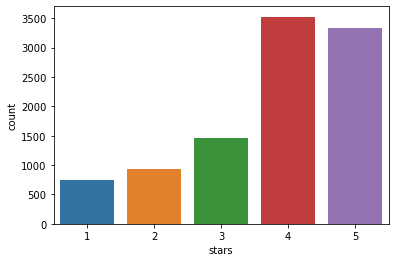

In [119]:
sns.countplot(yelp['stars'])

In [121]:
stars=yelp.groupby('stars').mean()
stars.head()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [122]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


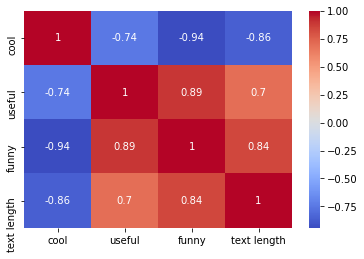

In [125]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [132]:
yelp_class=yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [149]:
X=yelp_class['text']
y=yelp_class['stars']
cv=CountVectorizer()
X=cv.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [151]:
nb=MultinomialNB()

In [153]:
nb.fit(X_train,y_train)

MultinomialNB()

In [156]:
pred=nb.predict(X_test)

In [157]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

[[159  69]
 [ 22 976]]


In [170]:
pl3=Pipeline([('bow',CountVectorizer(analyzer=text_process)),
             ('tfidf',TfidfTransformer()),
             ('classifier',MultinomialNB())])

In [171]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [172]:
pl3.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f865bbb6790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [174]:
pred=pl3.predict(X_test)

In [175]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

[[  0 228]
 [  0 998]]


/Users/reziw3/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
pl4=Pipeline([('bow',CountVectorizer(analyzer=text_process)),
             ('tfidf',TfidfTransformer()),
             ('classifier',RandomForestClassifier())])

In [178]:
pl4.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f865bbb6790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [179]:
pred=pl4.predict(X_test)

In [180]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.98      0.28      0.44       228
           5       0.86      1.00      0.92       998

    accuracy                           0.87      1226
   macro avg       0.92      0.64      0.68      1226
weighted avg       0.88      0.87      0.83      1226

[[ 64 164]
 [  1 997]]
